In [92]:
from methods import (Additive_Multiplicative_Matrix_Transformation, 
                     Block_Wise_AES_Encryption, 
                     Block_Wise_Pixel_Shuffling, 
                     Differentially_Private_Pixelization, 
                     FFX_Encryption_Transformation, 
                     Pixel_Negative_Positive_Transformation, 
                     Random_Multidimensional_Transformation, 
                     Scalable_Image_Transformation, 
                     SVD_Based_Image_Obfuscation)

In [87]:
from datasets.mnist import MNIST
from datasets.cifar10 import CIFAR10
import itertools

import numpy as np
import matplotlib.pyplot as plt
import random

In [75]:
mnist = MNIST().dataset
cifar10 = CIFAR10().dataset
image, label = mnist[0]

In [104]:
print(type(image), image.shape)

<class 'numpy.ndarray'> (28, 28)


In [76]:
AMMT = Additive_Multiplicative_Matrix_Transformation.Additive_Multiplicative_Matrix_Transformation(
    image = image,
    rise_v=random.choice([100, 200, 300, 400]),
    max_v_add=random.choice([256, 512, 1024, 2048]),
    max_v_mul=random.choice([10, 100, 1000, 10000])
)
BWAE = Block_Wise_AES_Encryption.Block_Wise_AES_Encryption(
        image=image,
        block_size=(4, 4),
        One_cipher=True,
        Shuffle=True
    )

block number = 49


In [129]:
def show(image, methods):
    fig = plt.figure(figsize=(20,20)) 
    ax1 = fig.add_subplot(1, 10, 1)
    plt.title('original',fontsize=10)
    ax1.imshow(image,cmap='gray')
    for index, method in enumerate(methods):
        ax = fig.add_subplot(1, 10, index+2)
        plt.title(f'{method.method_label}',fontsize=10)
        ax.imshow(method.apply().astype('uint8'),cmap='gray')

In [130]:
def transfer(image):
    AMMT = Additive_Multiplicative_Matrix_Transformation.Additive_Multiplicative_Matrix_Transformation(image = image,rise_v=random.choice([100, 200, 300, 400]),max_v_add=random.choice([256, 512, 1024, 2048]),max_v_mul=random.choice([10, 100, 1000, 10000]))
    BWAE = Block_Wise_AES_Encryption.Block_Wise_AES_Encryption(image=image,block_size=(4, 4),One_cipher=True,Shuffle=True)
    DPP = Differentially_Private_Pixelization.Differentially_Private_Pixelization(image=image,block_size=4,m=4,epsilon=0.5)
    PNPT = Pixel_Negative_Positive_Transformation.Pixel_Negative_Positive_Transformation(image=image,Kc=(2024, 2025, 2026),Ks=random.randint(0, 5))
    RMT = Random_Multidimensional_Transformation.Random_Multidimensional_Transformation(image=image,block_size=2,Shuffle=True)
    SIT = Scalable_Image_Transformation.Scalable_Image_Transformation(image=image,block_size=4,key1=random.choice([1, 2, 3, 4]),key2=2024,key3=random.choice([0, 1, 2]),key4=random.choice([0, 1, 2, 3, 4, 5]),key5=2024)
    SVDO = SVD_Based_Image_Obfuscation.SVD_Based_Image_Obfuscation(image=image,k=5,epsilon=0.5)
    # FFX = FFX_Encryption_Transformation.FFX_Encryption_Transformation(block_size=4,seed=2024, password="password",image=image)
    # BWPS = Block_Wise_Pixel_Shuffling.Block_Wise_Pixel_Shuffling(block_size=4,seed=2024,image=image,)
    
    return [AMMT,BWAE,DPP,PNPT,RMT,SIT,SVDO]

block number = 64
block number = 49


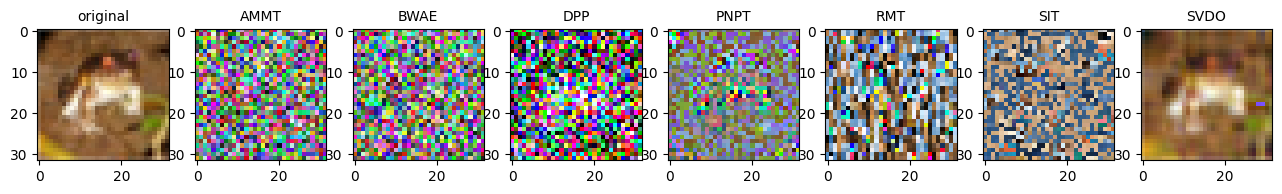

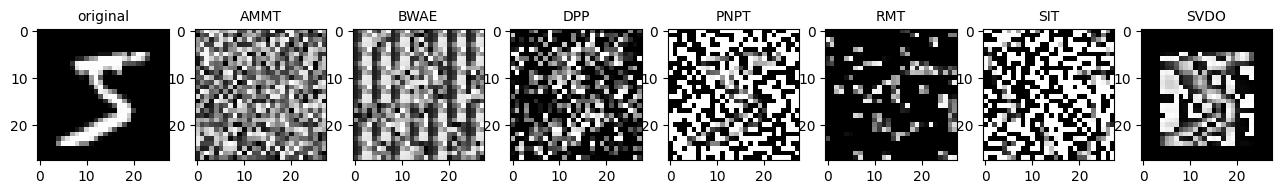

In [131]:
for image, label in itertools.islice(iter(cifar10), 1):
    image = image.astype('uint8')
    show(image, transfer(image))
for image, label in itertools.islice(iter(mnist), 1):
    image = image.astype('uint8')
    show(image, transfer(image))